In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

In [56]:
data = pd.read_csv("/content/updated_diamonds.csv")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,market_demand
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Low
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Low
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,Low
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,Low
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,Low


In [57]:
data.shape

(53940, 11)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   cut            53940 non-null  object 
 2   color          53940 non-null  object 
 3   clarity        53940 non-null  object 
 4   depth          53940 non-null  float64
 5   table          53940 non-null  float64
 6   price          53940 non-null  int64  
 7   x              53940 non-null  float64
 8   y              53940 non-null  float64
 9   z              53940 non-null  float64
 10  market_demand  53940 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 4.5+ MB


In [59]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


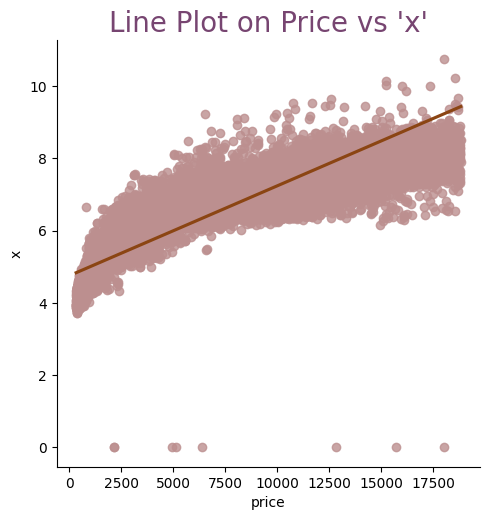

In [60]:
lm = sns.lmplot(x="price", y="x", data=data, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'x'", color="#774571", fontsize = 20)
plt.show()

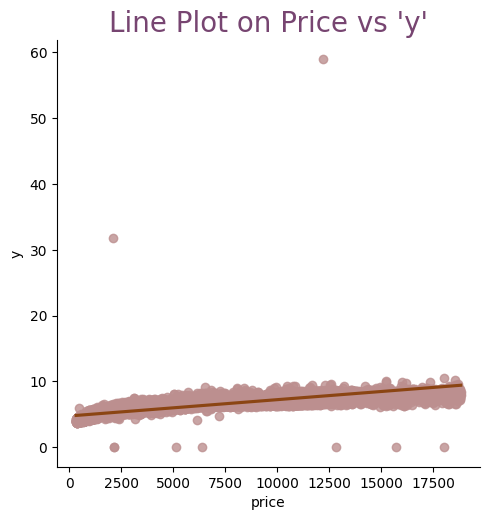

In [61]:
lm = sns.lmplot(x="price", y="y", data=data, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'y'", color="#774571", fontsize = 20)
plt.show()

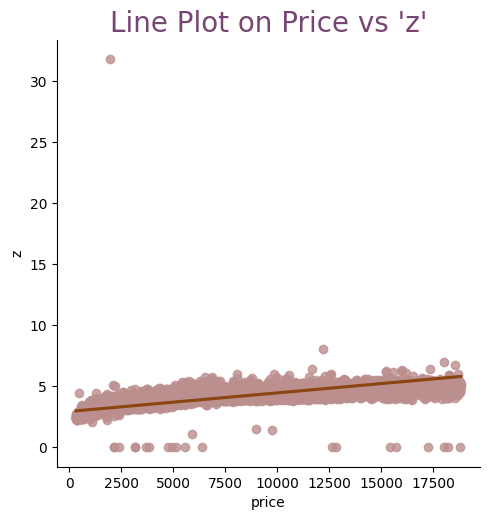

In [62]:
lm = sns.lmplot(x="price", y="z", data=data, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'z'", color="#774571", fontsize = 20)
plt.show()

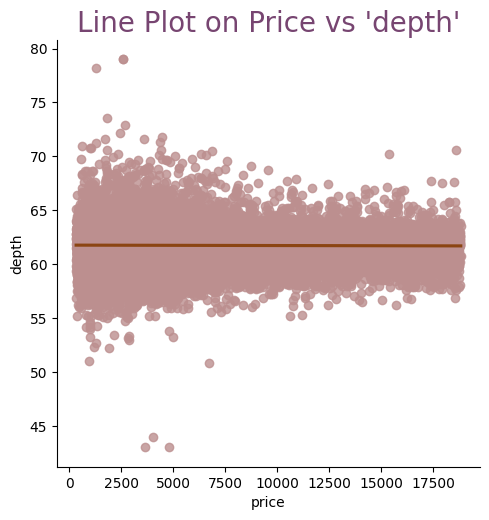

In [63]:
lm = sns.lmplot(x="price", y="depth", data=data, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'depth'", color="#774571", fontsize = 20)
plt.show()

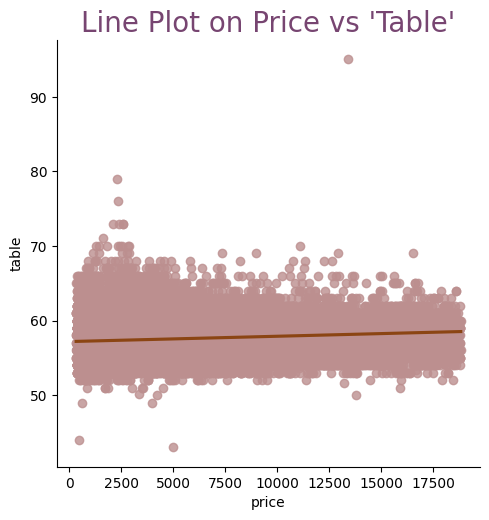

In [64]:
lm = sns.lmplot(x="price", y="table", data=data, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'Table'", color="#774571", fontsize = 20)
plt.show()

In [65]:
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape

(53920, 11)

In [66]:
data = data[(data["depth"]<75)&(data["depth"]>45)]
data = data[(data["table"]<80)&(data["table"]>40)]
data = data[(data["x"]<30)]
data = data[(data["y"]<30)]
data = data[(data["z"]<30)&(data["z"]>2)]
data.shape

(53907, 11)

In [67]:
s = (data.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity', 'market_demand']


In [68]:
label_data = data.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,market_demand
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43,1
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31,1
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31,1
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63,1
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75,1


In [69]:
data.describe()

,carat,depth,table,price,x,y,z
count,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000
mean,0.797628,61.749741,57.455948,3930.584470,5.731463,5.733292,3.539441
std,0.473765,1.420119,2.226153,3987.202815,1.119384,1.111252,0.691434
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


<Axes: >

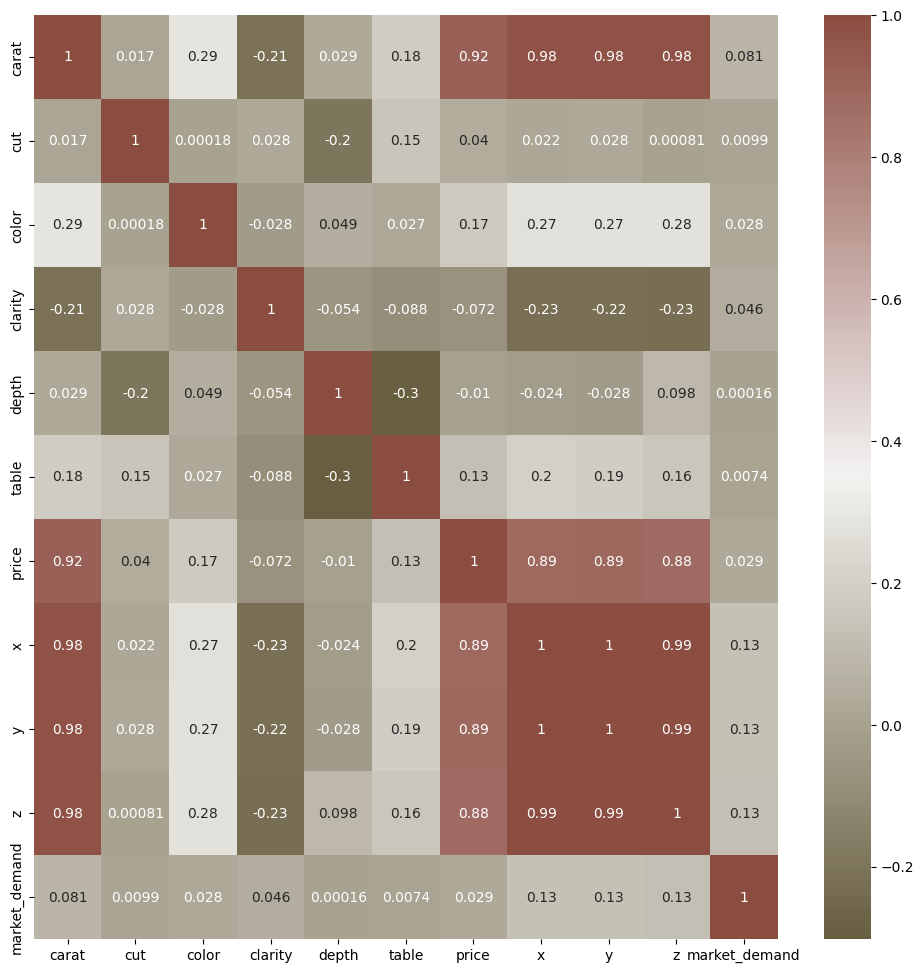

In [70]:
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= label_data.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

In [71]:
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=7)

In [72]:
pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

pipeline_extra_trees = Pipeline([("scalar_extra_trees", StandardScaler()),
    ("extra_trees_regressor", ExtraTreesRegressor())
])

pipeline_gam = Pipeline([("scalar_gam", StandardScaler()),
                         ("gam", GradientBoostingRegressor())])

pipeline_mlp = Pipeline([("scalar_mlp", StandardScaler()),
                         ("mlp", MLPRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb,pipeline_extra_trees,pipeline_gam,pipeline_mlp]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor",5:"extratree",6:"GradientBoostingRegressor= ",7:"Multi-layerP"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [73]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1341.896357 
DecisionTree: -617.479720 
RandomForest: -457.012127 
KNeighbors: -611.150085 
XGBRegressor: -459.296958 
extratree: -451.914588 
GradientBoostingRegressor= : -599.776178 


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Multi-layerP: -796.468937 


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [74]:
pred = pipeline_extra_trees.predict(X_test)

In [75]:
print("R^2 1:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
mae = metrics.mean_absolute_error(y_test, pred)
mse = metrics.mean_squared_error(y_test, pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))

# print('mae:',mae,'mse:', mse,'rmse:', rmse)

R^2 1: 0.9869809379909827
Adjusted R^2: 0.9869688508477193


In [ ]:
name=["LinearRegression","DecisionTree","RandomForest","KNeighbors","XGBRegressor","ExtraTreeRegressor","Gradient Boosting Regressor","Multi-layer Perceptron"]
r2=[0.890147120081938, 0.976653409386165, 0.9867695846529968, 0.9774961400955857, 0.986533936151693, 0.986882259616122, 0.9776026800967961, 0.9658801106277717]

mae=[ 868.3945656589071, 306.3241513633834, 235.31053960745862, 336.9921164904471, 243.02285049373376, 232.81381747356707, 350.71547536669635, 437.5751503157022]
mse= [1690522.8504577102, 359280.0201725097, 203602.4861782241, 346311.26120942313, 207228.87427498834, 201868.53436940734, 344671.7201553494, 525070.0089234287]
rmse= [1300.2010807785502, 599.3997165268847, 451.22332184653766, 588.4821672824277, 455.2239825349586, 449.29782368648006, 587.0874893534603, 724.6171464459205]


evaluation_dataframe = pd.DataFrame({"Model": name,
                                     "MAE": mae,
                                     "MSE": mse,
                                     "RMSE": rmse,
                                     "R Squared": r2})

evaluation_dataframe

,Model,MAE,MSE,RMSE,R Squared
0,LinearRegression,868.394566,1.690523e+06,1300.201081,0.890147
1,DecisionTree,306.324151,3.592800e+05,599.399717,0.976653
2,RandomForest,235.310540,2.036025e+05,451.223322,0.986770
3,KNeighbors,336.992116,3.463113e+05,588.482167,0.977496
4,XGBRegressor,243.022850,2.072289e+05,455.223983,0.986534
5,ExtraTreeRegressor,232.813817,2.018685e+05,449.297824,0.986882
6,Gradient Boosting Regressor,350.715475,3.446717e+05,587.087489,0.977603
7,Multi-layer Perceptron,437.575150,5.250700e+05,724.617146,0.965880


In [ ]:
name=["LinearRegression","DecisionTree","RandomForest","KNeighbors","XGBRegressor","extratree","GradientBoostingRegressor","Multi-layerP"]
r2=[0.890147120081938, 0.976653409386165, 0.9867695846529968, 0.9774961400955857, 0.986533936151693, 0.986882259616122, 0.9776026800967961, 0.9658801106277717]

In [ ]:
import matplotlib.pyplot as plt

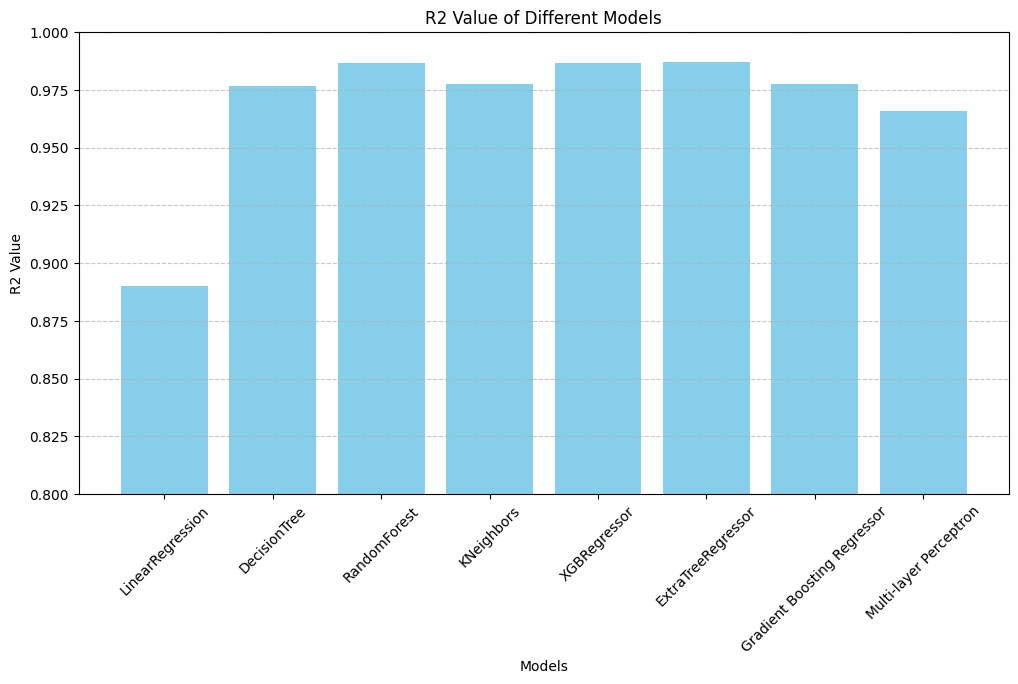

In [ ]:
name=["LinearRegression","DecisionTree","RandomForest","KNeighbors","XGBRegressor","ExtraTreeRegressor","Gradient Boosting Regressor","Multi-layer Perceptron"]
r2=[0.890147120081938, 0.976653409386165, 0.9867695846529968, 0.9774961400955857, 0.986533936151693, 0.986882259616122, 0.9776026800967961, 0.9658801106277717]
plt.figure(figsize=(12, 6))  # Adjust the figure size if needed
plt.bar(name, r2, color='skyblue')
plt.xlabel('Models')
plt.ylabel('R2 Value')
plt.title('R2 Value of Different Models')
plt.xticks(rotation=45)  # Rotate the model names on x-axis for better readability
plt.ylim(0.8, 1.0)  # Adjust the y-axis limits if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better visualization
plt.show()